In [ ]:
import torch

## 2.1 Создание нейронов и полносвязных слоев

2.1.1. Используя операции над матрицами и векторами из библиотеки `torch`, реализовать нейрон с заданными весами `weights` и `bias`. Прогнать вектор `inputs` через нейрон и вывести результат.

In [ ]:
class Neuron:
    def __init__(self, weights, bias):
        # <создать атрибуты объекта weights и bias>
        self.weights = weights
        self.bias = bias

    def forward(self, inputs):
        # <реализовать логику нейрона>
        return torch.dot(self.weights , inputs) + bias

In [ ]:
inputs = torch.tensor([1.0, 2.0, 3.0, 4.0])
weights = torch.tensor([-0.2, 0.3, -0.5, 0.7])
bias = 3.14

In [ ]:
neuron = Neuron(weights, bias)
neuron.forward(inputs)

tensor(4.8400)

2.1.2 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать полносвязный слой с заданными весами `weights` и `biases`. Прогнать вектор `inputs` через слой и вывести результат.

In [ ]:
class Linear:
    def __init__(self, weights, biases):
        # <создать атрибуты объекта weights и biases>
        self.weights = weights
        self.biases = biases

    def forward(self, inputs):
        # <реализовать логику слоя>
        return torch.mv(self.weights.T, inputs) + self.biases

In [ ]:
inputs = torch.tensor([1.0, 2.0, 3.0, 4.0])
weights = torch.tensor([[-0.2, 0.3, -0.5, 0.7],
                        [0.5, -0.91, 0.26, -0.5],
                        [-0.26, -0.27, 0.17, 0.87]]).T

biases = torch.tensor([3.14, 2.71, 7.2])

In [ ]:
linear = Linear(weights=weights, biases=biases)
linear.forward(inputs=inputs)

tensor([ 4.8400,  0.1700, 10.3900])

2.1.3 Реализовать полносвязный слой из __2.1.2__ таким образом, чтобы он мог принимать на вход матрицу (батч) с данными. Продемонстрировать работу.
Результатом прогона сквозь слой должна быть матрица размера `batch_size` x `n_neurons`.


In [ ]:
class Linear:
    def __init__(self, weights, biases):
        # <создать атрибуты объекта weights и biases>
        self.weights = weights
        self.biases = biases

    def forward(self, inputs):
        # <реализовать логику слоя>
        return torch.matmul(inputs, self.weights) + self.biases

In [ ]:
inputs = torch.tensor([[1, 2, 3, 2.5],
                       [2, 5, -1, 2],
                       [-1.5, 2.7, 3.3, -0.8]])

In [ ]:
linear = Linear(weights=weights, biases=biases)
linear.forward(inputs=inputs)

tensor([[ 3.7900,  0.9200,  9.0850],
        [ 6.1400, -2.1000,  6.9000],
        [ 2.0400,  0.7610,  6.7260]])

2.1.4 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать полносвязный слой из `n_neurons` нейронов с `n_features` весами у каждого нейрона (инициализируются из стандартного нормального распределения). Прогнать вектор `inputs` через слой и вывести результат. Результатом прогона сквозь слой должна быть матрица размера `batch_size` x `n_neurons`.

In [ ]:
class Linear:
    def __init__(self, n_features, n_neurons):
    # <создать атрибуты объекта weights и biases>
        self.weights = torch.randn((n_features, n_neurons))
        self.biases = torch.randn(n_neurons)

    def forward(self, inputs):
        # <реализовать логику слоя>
        return torch.matmul(inputs, self.weights) + self.biases

In [ ]:
inputs = torch.tensor([[1, 2, 3, 2.5],
                       [2, 5, -1, 2],
                       [-1.5, 2.7, 3.3, -0.8]])

In [ ]:
linear = Linear(n_features = 4, n_neurons = 3)
linear.forward(inputs)

tensor([[ 3.0721, -2.5446, -0.8383],
        [-0.0154,  7.9023,  4.7517],
        [-1.1500,  1.6252,  2.6870]])

2.1.5 Используя решение из __2.1.4__, создать 2 полносвязных слоя и пропустить матрицу `inputs` последовательно через эти два слоя. Количество нейронов в первом слое выбрать произвольно, количество нейронов во втором слое выбрать так, чтобы результатом прогона являлась матрица (3x7).

In [ ]:
inputs = torch.tensor([[1, 2, 3, 2.5],
                       [2, 5, -1, 2],
                       [-1.5, 2.7, 3.3, -0.8]])

In [ ]:
n_neurons_mid = 7
linear1 = Linear(n_features=4, n_neurons=n_neurons_mid)
linear2 = Linear(n_features=n_neurons_mid, n_neurons=7)
linear2.forward(linear1.forward(inputs))

tensor([[ -0.5949, -11.9993,  21.2437,  -2.6296,  -8.0815,  -2.4103,  -9.6444],
        [ 16.1198, -27.2605,  45.1332,  22.0054, -21.5142,  -6.0962,   1.0238],
        [-17.4526, -14.6354,  22.7149, -14.7765,   1.3572,  -6.9055, -21.3152]])

## 2.2 Создание функций активации

2.2.1 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать функцию активации ReLU:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/f4353f4e3e484130504049599d2e7b040793e1eb)

Создать матрицу размера (4,3), заполненную числами из стандартного нормального распределения, и проверить работоспособность функции активации.

In [ ]:
class ReLU:
    def forward(self, inputs):
    # <реализовать логику ReLU>
        return torch.where(inputs < 0, 0, inputs)

In [ ]:
inputs = torch.randn((4, 3))
ReLU().forward(inputs)

tensor([[1.2613, 0.3973, 0.0000],
        [1.3587, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000],
        [0.7482, 0.0000, 0.4813]])

2.2.2 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать функцию активации softmax:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/6d7500d980c313da83e4117da701bf7c8f1982f5)

Создать матрицу размера (4,3), заполненную числами из стандартного нормального распределения, и проверить работоспособность функции активации. Строки матрицы трактовать как выходы линейного слоя некоторого классификатора для 4 различных примеров.

In [ ]:
class Softmax:
    def forward(self, inputs):
    # <реализовать логику Softmax>
        exp = torch.exp(inputs)
        summ = exp.sum(-1)
        return exp / summ.unsqueeze(-1)

In [ ]:
inputs = torch.randn((4, 3))
Softmax().forward(inputs)

tensor([[0.0595, 0.3652, 0.5754],
        [0.3991, 0.0985, 0.5024],
        [0.0616, 0.0434, 0.8949],
        [0.2889, 0.5704, 0.1407]])

2.2.3 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать функцию активации ELU:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/eb23becd37c3602c4838e53f532163279192e4fd)

Создать матрицу размера (4,3), заполненную числами из стандартного нормального распределения, и проверить работоспособность функции активации.

In [ ]:
class ELU:
    def __init__(self, alpha):
        # <создать атрибут объекта alpha>
        self.alpha = alpha

    def forward(self, inputs):
        # <реализовать логику ReLU>
        return torch.where(inputs < 0, self.alpha*(torch.exp(inputs) - 1), inputs)

In [ ]:
inputs = torch.randn((4, 3))
ELU(alpha=0.2).forward(inputs)

tensor([[ 0.3426,  0.1349, -0.0967],
        [-0.1228, -0.0284, -0.0881],
        [-0.0750,  0.4555, -0.1297],
        [ 0.1911,  1.4624, -0.0824]])

## 2.3 Создание функции потерь

2.3.1 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать функцию потерь MSE:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/e258221518869aa1c6561bb75b99476c4734108e)

Создать полносвязный слой с 1 нейроном, прогнать через него батч `inputs` и посчитать значение MSE, трактуя вектор `y` как вектор правильных ответов.

In [ ]:
class MSELoss:
    def forward(self, y_pred, y_true):
        # <реализовать логику MSE>
        return ((y_pred - y_true.unsqueeze(-1)) ** 2).mean().item()

In [ ]:
inputs = torch.tensor([[1, 2, 3, 2.5],
                       [2, 5, -1, 2],
                       [-1.5, 2.7, 3.3, -0.8]])

y = torch.tensor([2, 3, 4])

In [ ]:
linear = Linear(n_features=inputs.shape[-1], n_neurons=1)
outputs = linear.forward(inputs)
print(outputs)
MSELoss().forward(outputs, y)

tensor([[ 1.1309],
        [-2.7571],
        [-2.2199]])


24.195497512817383

2.3.2 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать функцию потерь Categorical Cross-Entropy:

<img src="https://i.ibb.co/93gy1dN/Screenshot-9.png" width="200">

Создать полносвязный слой с 3 нейронами и прогнать через него батч `inputs`. Полученный результат пропустить через функцию активации softmax. Посчитать значение CCE, трактуя вектор `y` как вектор правильных ответов.

In [ ]:
class CategoricalCrossentropyLoss:
    def forward(self, y_pred, y_true):
        return -(y_true.unsqueeze(-1) * y_pred.log()).sum(-1)

In [ ]:
inputs = torch.tensor([[1, 2, 3, 2.5],
                        [2, 5, -1, 2],
                        [-1.5, 2.7, 3.3, -0.8]])
y = torch.tensor([1, 0, 0])

In [ ]:
linear = Linear(n_features=inputs.shape[-1], n_neurons=3)
outputs = linear.forward(inputs)
activated_outputs = Softmax().forward(outputs)
CategoricalCrossentropyLoss().forward(y_pred=activated_outputs, y_true=y)

tensor([8.8368, -0.0000, -0.0000])

2.3.3 Модифицировать 2.3.1, добавив L2-регуляризацию.

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/d92ca2429275bfdc0474523babbafe014ca8b580)


In [ ]:
class MSELossL2:
    def __init__(self, lambda_):
    # <создать атрибут объекта alpha>
        self.lambda_ = lambda_

    def data_loss(self, y_pred, y_true):
    # <подсчет первого слагаемого из формулы>
        return ((y_pred - y_true.unsqueeze(-1)) ** 2).sum()

    def reg_loss(self, layer):
    # используйте атрибуты объекта layer, в которых хранятся веса слоя
    # <подсчет второго слагаемого из формулы>
        return (layer.weights ** 2).sum() * self.lambda_

    def forward(self, y_pred, y_true, layer):
        return self.data_loss(y_pred, y_true) + self.reg_loss(layer)

In [ ]:
inputs = torch.tensor([[1, 2, 3, 2.5],
                        [2, 5, -1, 2],
                        [-1.5, 2.7, 3.3, -0.8]])
y = torch.tensor([1, 0, 0])

In [ ]:
linear = Linear(n_features=inputs.shape[-1], n_neurons=1)
outputs = linear.forward(inputs)
MSELossL2(lambda_=0.1).forward(y_pred=outputs, y_true=y, layer=linear)

tensor(119.4891)

## 2.4 Обратное распространение ошибки

2.4.1 Используя один нейрон и SGD (1 пример за шаг), решите задачу регрессии

In [ ]:
from sklearn.datasets import make_regression

X, y, coef = make_regression(n_features=4, n_informative=4, coef=True, bias=0.5)
X = torch.from_numpy(X).to(dtype=torch.float32)
y = torch.from_numpy(y).to(dtype=torch.float32)

[Граф вычислений для этой задачи](https://i.ibb.co/2dhDxZx/photo-2021-02-15-17-18-04.jpg)

2.4.1.1 Реализуйте класс `SquaredLoss`


In [ ]:
class SquaredLoss:
    def forward(self, y_pred, y_true):
        # <реализовать логику MSE>
        return (y_pred - y_true) ** 2

    def backward(self, y_pred, y_true):
        self.dinput = 2 * (y_pred - y_true)# df/dc


2.4.1.2. Модифицируйте класс `Neuron` из __2.1.1__:

  1) Сделайте так, чтобы веса нейрона инициализировались из стандартного нормального распределения

  2) Реализуйте расчет градиента относительно весов `weights` и `bias`

In [ ]:
class Neuron:
    def __init__(self, n_inputs):
        # <создать атрибуты объекта weights и bias>
        self.weights = torch.randn(n_inputs)
        self.bias = torch.randn(1)

    def forward(self, inputs):
        # <реализовать логику нейрона>
        self.inputs = inputs
        return (inputs * self.weights).sum() + self.bias

    def backward(self, dvalue):
        # dvalue - значение производной, которое приходит нейрону от следующего слоя сети
        # в данном случае это будет значение df/dc (созданное методом backwards у объекта MSELoss)
        self.dweights = dvalue * self.inputs# df/dW
        self.dinput =  dvalue * self.weights# df/wX
        self.dbias = dvalue# df/db


2.4.1.3 Допишите цикл для настройки весов нейрона

[SGD](https://ru.wikipedia.org/wiki/%D0%A1%D1%82%D0%BE%D1%85%D0%B0%D1%81%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D0%B9_%D0%B3%D1%80%D0%B0%D0%B4%D0%B8%D0%B5%D0%BD%D1%82%D0%BD%D1%8B%D0%B9_%D1%81%D0%BF%D1%83%D1%81%D0%BA)

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/dda3670f8a8996a0d3bf80856bb4a166cc8db6d4)

In [ ]:
n_inputs = X.shape[-1]# <размерность элемента выборки >
learning_rate = 0.1 #скорость обучения
n_epoch = 100 #количество эпох
print(n_inputs)
neuron = Neuron(n_inputs)
loss = SquaredLoss()

losses = []
for epoch in range(100):
    for x_example, y_example in zip(X, y):
        # forward pass
        y_pred = neuron.forward(x_example)# <прогон через нейрон>
        curr_loss = loss.forward(y_pred, y_example) # <прогон через функцию потерь>
        losses.append(curr_loss)

        # backprop
        # <вызов методов backward>
        # обратите внимание на последовательность вызовов: от конца к началу
        loss.backward(y_pred, y_example)
        neuron.backward(loss.dinput)
        # <шаг оптимизации для весов (weights и bias) нейрона>
        neuron.weights -= learning_rate * neuron.dweights
        neuron.bias -= learning_rate * neuron.dbias

4


In [ ]:
losses[::170]

[tensor([65239.4844]),
 tensor([3.6380e-12]),
 tensor([0.]),
 tensor([5.8208e-11]),
 tensor([8.1855e-10]),
 tensor([0.]),
 tensor([3.6380e-10]),
 tensor([2.3283e-10]),
 tensor([2.3283e-10]),
 tensor([2.3283e-10]),
 tensor([9.3132e-10]),
 tensor([3.6380e-12]),
 tensor([0.]),
 tensor([5.8208e-11]),
 tensor([8.1855e-10]),
 tensor([0.]),
 tensor([3.6380e-10]),
 tensor([2.3283e-10]),
 tensor([2.3283e-10]),
 tensor([2.3283e-10]),
 tensor([9.3132e-10]),
 tensor([3.6380e-12]),
 tensor([0.]),
 tensor([5.8208e-11]),
 tensor([8.1855e-10]),
 tensor([0.]),
 tensor([3.6380e-10]),
 tensor([2.3283e-10]),
 tensor([2.3283e-10]),
 tensor([2.3283e-10]),
 tensor([9.3132e-10]),
 tensor([3.6380e-12]),
 tensor([0.]),
 tensor([5.8208e-11]),
 tensor([8.1855e-10]),
 tensor([0.]),
 tensor([3.6380e-10]),
 tensor([2.3283e-10]),
 tensor([2.3283e-10]),
 tensor([2.3283e-10]),
 tensor([9.3132e-10]),
 tensor([3.6380e-12]),
 tensor([0.]),
 tensor([5.8208e-11]),
 tensor([8.1855e-10]),
 tensor([0.]),
 tensor([3.6380e-10]),

2.4.2 Решите задачу 2.4.1, используя пакетный градиентный спуск

Вычисления для этой задачи:
[1](https://i.ibb.co/rmtQT6P/photo-2021-02-15-18-00-43.jpg)
[2](https://i.ibb.co/NmCFVnQ/photo-2021-02-15-18-01-17.jpg)

2.4.1.1 Модифицируйте класс `MSELoss` из __2.3.1__, реализовав расчет производной относительно предыдущего слоя с учетом того, что теперь работа ведется с батчами, а не с индивидуальными примерами


In [ ]:
class MSELoss:
    def forward(self, y_pred, y_true):
        return ((y_pred.view(-1, 1) - y_true.view(-1, 1)) ** 2).mean()

    def backward(self, y_pred, y_true):
        self.dinput = -2 *(y_true.view(-1, 1) - y_pred.view(-1, 1)) / y_true.shape[0]


2.4.2.2. Модифицируйте класс `Neuron` из __2.4.1.2__:

  1) Реализуйте метод `forward` таким образом, чтобы он мог принимать на вход матрицу (батч) с данными.

  2) Реализуйте расчет градиента относительно весов `weights` и `bias` с учетом того, что теперь работа ведется с батчами, а не с индивидуальными примерами

In [ ]:
class Neuron:
    def __init__(self, n_inputs):
#         self.n_inputs = n_inputs
        self.weights = torch.randn(n_inputs,1)
        self.bias = torch.randn(1)

    def forward(self, inputs):
        self.inputs = inputs
        return torch.matmul(inputs, self.weights) + self.bias # <реализовать логику нейрона>

    def backward(self, dvalue):
        # dvalue - значение градиента, которое приходит нейрону от следующего слоя сети
        # в данном случае это будет градиент L по y^ (созданный методом backwards у объекта MSELoss)
        self.dweights = torch.matmul(self.inputs.T, dvalue) # df/dW
        self.dbias = dvalue.sum()# df/db


2.4.2.3 Допишите цикл для настройки весов нейрона

In [ ]:
n_inputs = X.shape[1]# <размерность элемента выборки >
learning_rate = 0.1 #  скорость обучения
n_epoch = 100 #  количество эпох
print(n_inputs)
neuron = Neuron(n_inputs)
loss = MSELoss()

losses = []
for epoch in range(100):
    # forward pass
    y_pred =  neuron.forward(X)# <прогон через нейрон>

    curr_loss = loss.forward(y_pred, y) # <прогон через функцию потерь>
    losses.append(curr_loss)

    # backprop
    # <вызов методов backward>
    # обратите внимание на последовательность вызовов: от конца к началу
    loss.backward(y_pred, y)
    neuron.backward(loss.dinput)
    # <шаг оптимизации для весов (weights и bias) нейрона>
    neuron.weights -= learning_rate * neuron.dweights
    neuron.bias -= learning_rate * neuron.dbias

4


In [ ]:
losses[::10]

[tensor(25983.9609),
 tensor(191.0207),
 tensor(2.5636),
 tensor(0.0614),
 tensor(0.0020),
 tensor(7.6810e-05),
 tensor(3.0378e-06),
 tensor(1.2274e-07),
 tensor(5.4500e-09),
 tensor(1.0742e-09)]

2.4.3  Используя один полносвязный слой и  пакетный градиетный спуск, решите задачу регрессии из __2.4.1__

2.4.3.1 Модифицируйте класс `Linear` из __2.1.4__. ([вычисление градиентов](https://i.ibb.co/kgVR6m6/photo-2021-02-15-21-30-28.jpg))

In [ ]:
class Linear:
    def __init__(self, n_features, n_neurons):
        # <создать атрибуты объекта weights и biases>
        self.weights = torch.randn(n_features, n_neurons)
        self.biases = torch.randn(n_neurons)

    def forward(self, inputs):
        self.inputs = inputs
        return torch.matmul(inputs, self.weights) + self.biases # <реализовать логику слоя>

    def backward(self, dvalues):
        self.dweights = torch.matmul(self.inputs.T, dvalues) # df/dW
        self.dbiases = torch.matmul(torch.ones(dvalues.shape[0]), dvalues) # df/db
        self.dinputs = torch.matmul(dvalues, self.weights.T) # df/dX

2.4.3.2 Создайте слой с одним нейроном. Используя класс MSELoss из 2.4.2, убедитесь, что модель обучается

In [ ]:
n_inputs = X.shape[1]
learning_rate = 0.01
n_epoch = 1000

layer = Linear(n_inputs, 1)
loss = MSELoss()

losses = []

for epoch in range(n_epoch):
    # forward pass
    y_pred = layer.forward(X)  # <прогон через нейрон>
    curr_loss = loss.forward(y_pred, y)  # <прогон через функцию потерь>
    losses.append(curr_loss)

    # backprop
    # <вызов методов backward>
    loss.backward(y_pred, y)
    layer.backward(loss.dinput)

    layer.weights -= learning_rate * layer.dweights
    layer.biases -= learning_rate * layer.dbiases

losses[::200]

[tensor(24973.5820),
 tensor(5.2980),
 tensor(0.0054),
 tensor(1.1272e-05),
 tensor(1.4327e-07)]

2.4.4 Используя наработки из 2.4, создайте нейросеть и решите задачу регрессии.

Предлагаемая архитектура:
1. Полносвязный слой с 10 нейронами
2. Активация ReLU
3. Полносвязный слой с 1 нейроном

In [ ]:
X = torch.linspace(-1, 1, 100).view(-1, 1)
y = X.pow(2) + 0.2 * torch.rand(X.size())

In [ ]:
class Activation_ReLU:
    def forward(self, inputs):
        self.inputs = inputs
        self.output = inputs.clip(min=0)
        return self.output

    def backward(self, dvalues):
        self.dinputs = dvalues.clone()
        self.dinputs[self.inputs <= 0] = 0

In [ ]:
# создание компонентов
fc1 = Linear(X.shape[1], 10)
relu1 = Activation_ReLU()
fc2 = Linear(10, 1)

loss = MSELoss()
lr = 0.01

ys = []
for epoch in range(2001):
    # <forward pass>
    # fc1 > relu1 > fc2 > loss
    y_pred = fc2.forward(relu1.forward(fc1.forward(X)))

    data_loss = loss.forward(y_pred, y) # <прогон через функцию потерь>

    if epoch % 200 == 0:
        print(f'epoch {epoch} mean loss {data_loss}')
        ys.append(y_pred)

    # <backprop>
    # loss > fc2 > relu1 > fc1
    loss.backward(y_pred, y)
    fc2.backward(loss.dinput)
    relu1.backward(fc2.dinputs)
    fc1.backward(relu1.dinputs)

    # <шаг оптимизации для fc1>
    fc1.weights -= lr * fc1.dweights
    fc1.biases -= lr * fc1.dbiases

    # <шаг оптимизации для fc2>
    fc2.weights -= lr * fc2.dweights
    fc2.biases -= lr * fc2.dbiases

epoch 0 mean loss 5.663071155548096
epoch 200 mean loss 0.1404476910829544
epoch 400 mean loss 0.10872770100831985
epoch 600 mean loss 0.08772239089012146
epoch 800 mean loss 0.07045391201972961
epoch 1000 mean loss 0.055765341967344284
epoch 1200 mean loss 0.04342503845691681
epoch 1400 mean loss 0.03348717838525772
epoch 1600 mean loss 0.02582361549139023
epoch 1800 mean loss 0.0200533177703619
epoch 2000 mean loss 0.015777824446558952


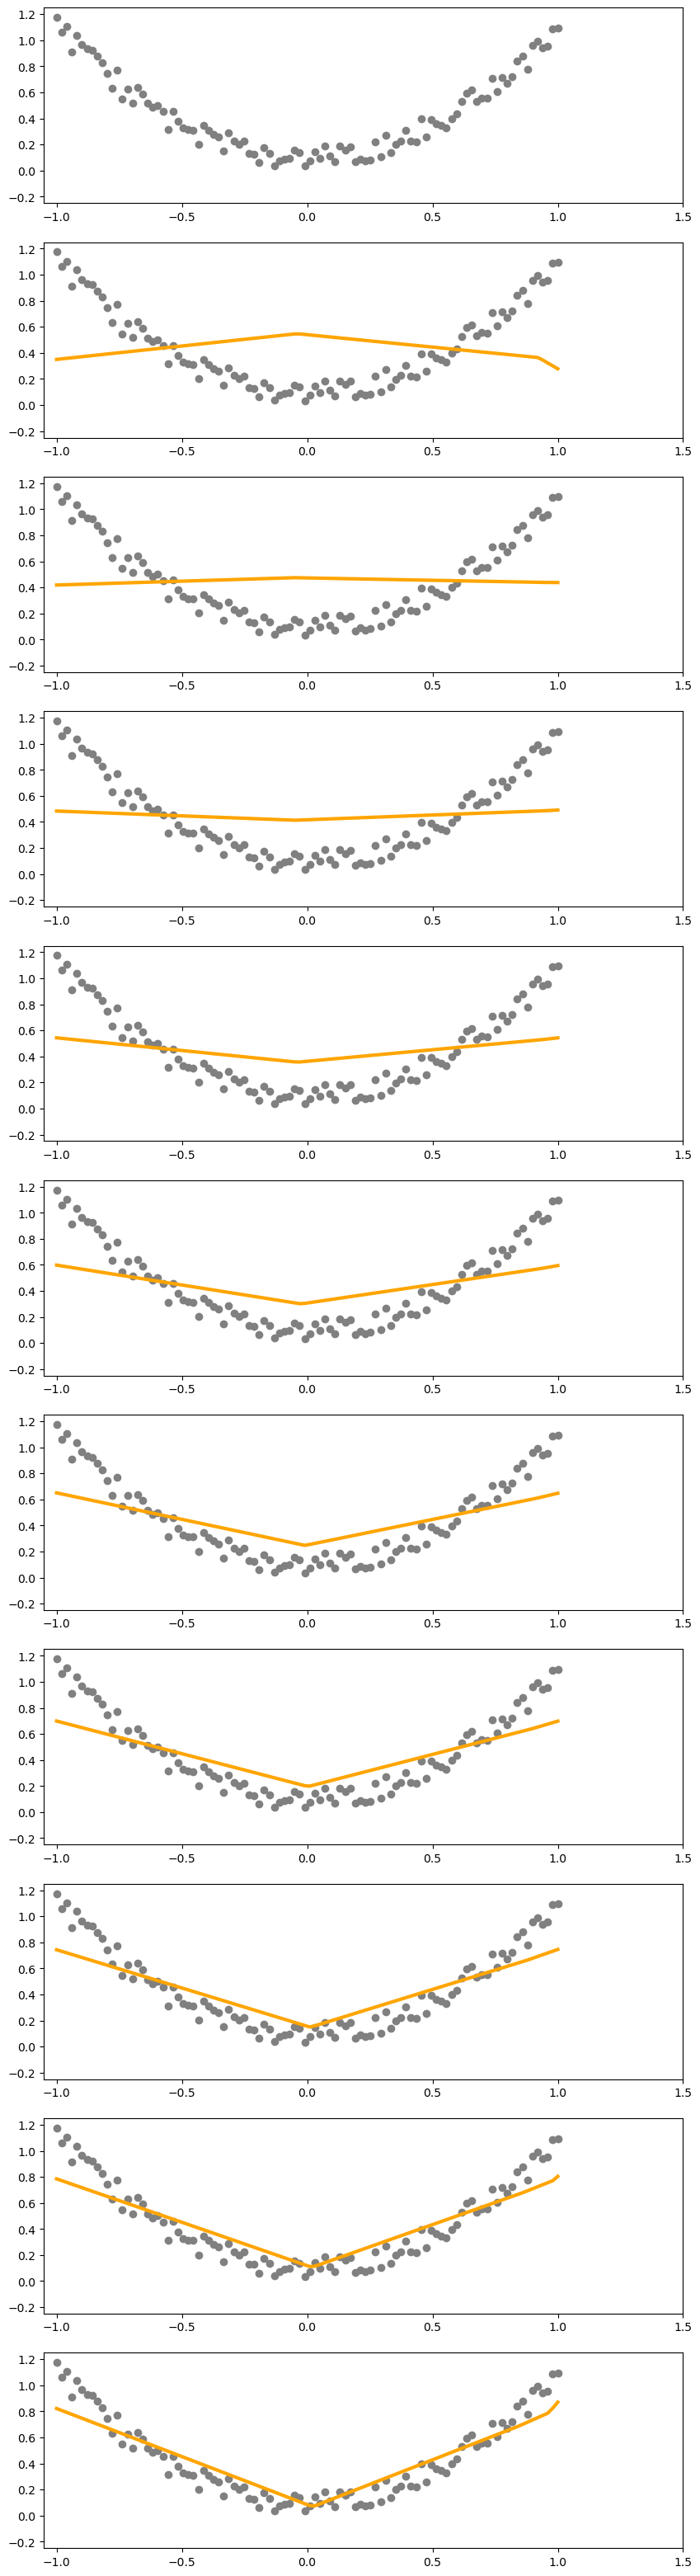

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(len(ys), 1, figsize=(10, 40))
for ax, y_ in zip(axs, ys):
    ax.scatter(X.numpy(), y.numpy(), color = "grey")
    ax.plot(X.numpy(), y_.numpy(), 'orange', lw=3)
    ax.set_xlim(-1.05, 1.5)
    ax.set_ylim(-0.25, 1.25)

In [ ]:
# Создание компонентов
fc1 = Linear(X.shape[1], 10)
relu1 = Activation_ReLU()
fc2 = Linear(10, 10)  # Второй полносвязный слой
relu2 = Activation_ReLU()  # Второй слой активации ReLU
fc3 = Linear(10, 1)

loss = MSELoss()
lr = 0.01

ys = []
for epoch in range(2001):
    # Прямой проход
    # fc1 > relu1 > fc2 > relu2 > fc3 > loss
    y_pred = fc3.forward(relu2.forward(fc2.forward(relu1.forward(fc1.forward(X)))))

    data_loss = loss.forward(y_pred, y)

    if epoch % 200 == 0:
        print(f'epoch {epoch} mean loss {data_loss}')
        ys.append(y_pred)

    # Обратное распространение ошибки
    # loss > fc3 > relu2 > fc2 > relu1 > fc1
    loss.backward(y_pred, y)
    fc3.backward(loss.dinput)
    relu2.backward(fc3.dinputs)
    fc2.backward(relu2.dinputs)
    relu1.backward(fc2.dinputs)
    fc1.backward(relu1.dinputs)

    # Шаг оптимизации для fc1
    fc1.weights -= lr * fc1.dweights
    fc1.biases -= lr * fc1.dbiases

    # Шаг оптимизации для fc2
    fc2.weights -= lr * fc2.dweights
    fc2.biases -= lr * fc2.dbiases

    # Шаг оптимизации для fc3
    fc3.weights -= lr * fc3.dweights
    fc3.biases -= lr * fc3.dbiases


epoch 0 mean loss 7.228129863739014
epoch 200 mean loss 0.01185885351151228
epoch 400 mean loss 0.0069472878240048885
epoch 600 mean loss 0.005742821842432022
epoch 800 mean loss 0.005354061257094145
epoch 1000 mean loss 0.005142247769981623
epoch 1200 mean loss 0.004974619019776583
epoch 1400 mean loss 0.00483302865177393
epoch 1600 mean loss 0.00470953993499279
epoch 1800 mean loss 0.004605238325893879
epoch 2000 mean loss 0.004516329616308212


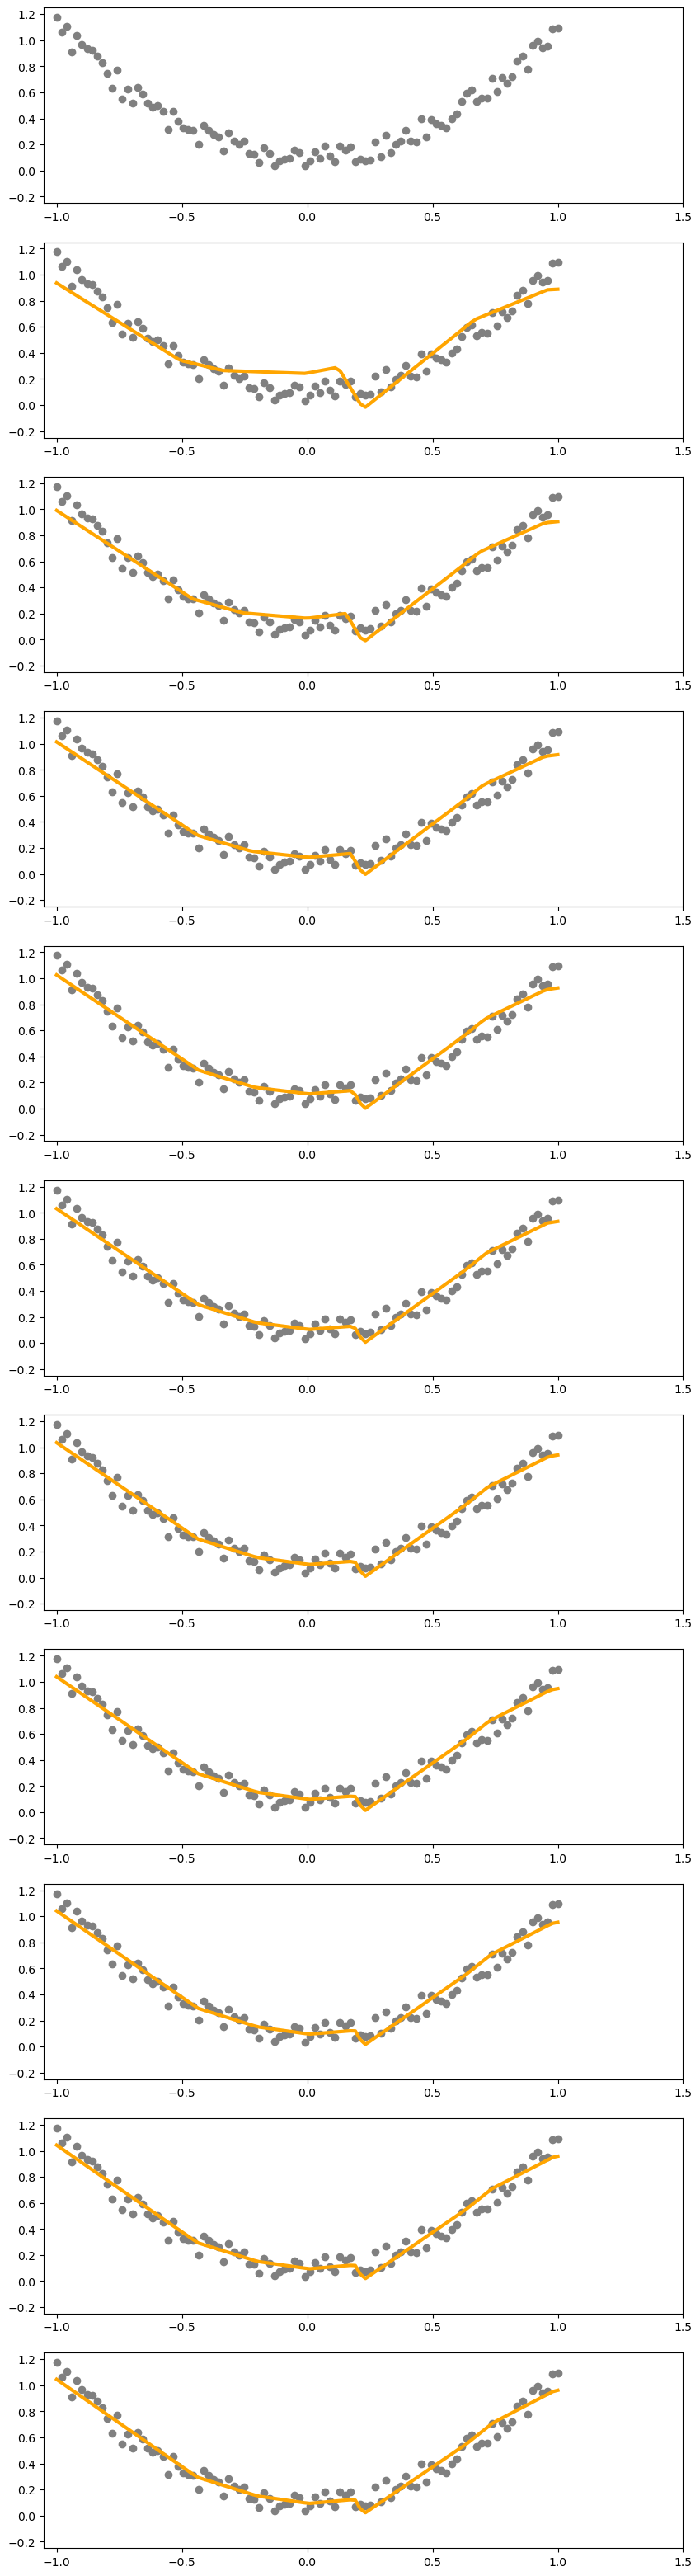

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(len(ys), 1, figsize=(10, 40))
for ax, y_ in zip(axs, ys):
    ax.scatter(X.numpy(), y.numpy(), color = "grey")
    ax.plot(X.numpy(), y_.numpy(), 'orange', lw=3)
    ax.set_xlim(-1.05, 1.5)
    ax.set_ylim(-0.25, 1.25)